In [4]:
# notebook last tested with abtem version 1.0.0beta7

from abtem import __version__
print('current version:', __version__)

from abtem.waves import PlaneWave
from abtem.dft import GPAWPotential
from abtem.transfer import CTF
from abtem.plot import show_atoms

from ase.io import read
from gpaw import GPAW

current version: 1.0.0beta7


# HRTEM simulation with GPAW potential

In [5]:
# Need converged calculator, this would usually be imported

atoms = read('data/hexagonal_graphene.cif')

gpaw = GPAW(h=.1, txt=None, kpts=(3,3,1))
atoms.calc = gpaw
atoms.get_potential_energy()

-19.68456129991716

In [14]:
potential = GPAWPotential(gpaw, sampling=.03).build()

In [15]:
wave = PlaneWave(
    energy=60e3 # acceleration voltage in eV
)

exit_wave = wave.multislice(potential)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x12e6b7780>)

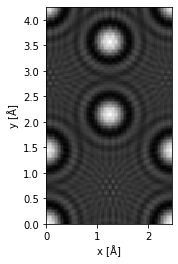

In [16]:
exit_wave.show()

<AxesSubplot:xlabel='alpha [mrad]', ylabel='Envelope'>

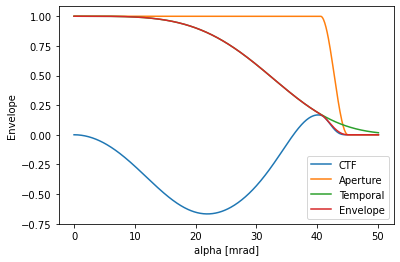

In [17]:
# See https://abtem.readthedocs.io/en/latest/walkthrough/05_contrast_transfer_function.html for parameter names

ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 45, # mrad
    focal_spread = 25, # Å
    defocus = -45.46, # Å
    Cs = -7e-6 * 1e10, # Å
)

ctf.show(50)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x12a7aa320>)

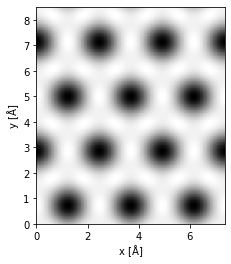

In [18]:
image_wave = exit_wave.apply_ctf(ctf)

image_wave.intensity().tile((3,2)).show()

In [19]:
# get image intensity as array

image_wave.intensity().array

array([[[1.0292135, 1.0292279, 1.0292743, ..., 1.0292158, 1.0292253,
         1.0292182],
        [1.0292236, 1.0292299, 1.0292684, ..., 1.0292472, 1.0292499,
         1.0292355],
        [1.0292519, 1.0292349, 1.0292484, ..., 1.0293391, 1.0293219,
         1.0292865],
        ...,
        [1.0292948, 1.0292386, 1.0292113, ..., 1.0294869, 1.0294367,
         1.0293664],
        [1.0292519, 1.0292346, 1.0292481, ..., 1.0293386, 1.0293217,
         1.0292863],
        [1.0292236, 1.0292299, 1.0292681, ..., 1.0292469, 1.0292497,
         1.0292355]]], dtype=float32)